In [597]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Gabriel Roberto de Queiroz
## Matrícula: 221020870

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

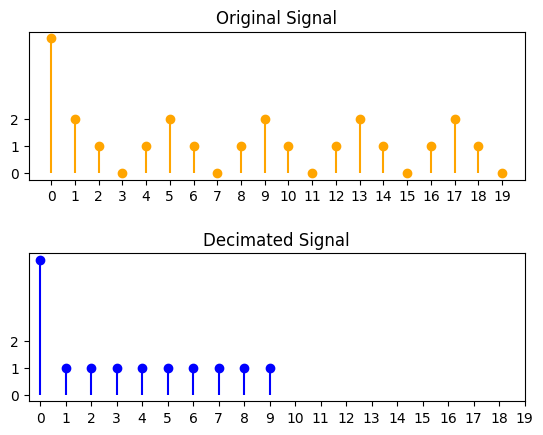

In [598]:
### Código da questão 1a.
FACTOR = 2
   
x = np.array([5, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0])

def decimator(x):
   return np.array(x[::FACTOR])

y = decimator(x)   

plt.figure()
plt.subplot(2, 1, 1)
plt.stem(x, linefmt='orange', markerfmt='o', basefmt=' ')
plt.xticks(np.arange(0, len(x), step=1))
plt.yticks(np.arange(0, 3, step=1))
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.stem(y, linefmt='blue', markerfmt='o', basefmt=' ')
plt.xticks(np.arange(0, len(x), step=1))
plt.yticks(np.arange(0, 3, step=1))
plt.title('Decimated Signal')

plt.subplots_adjust(hspace=0.5)
   
plt.show()



## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


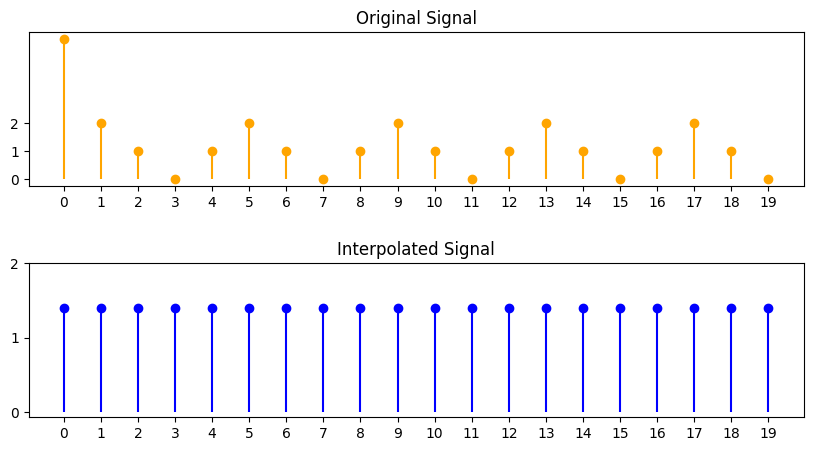

In [599]:
### Código da questão 1b.

INTERP_RULE = {
    "PREVIOUS": "PREVIOUS",
    "AVERAGE": "AVERAGE"
}
FACTOR = 2


def interpolator(y, rule):    
    if rule == "PREVIOUS":
        return np.array([y[i//FACTOR] for i in range(len(y)*FACTOR)])
    elif rule == "AVERAGE":
        return np.array([y.sum()/y.size for i in range(len(y)*FACTOR)])

    else:
        raise ValueError("Invalid interpolation rule")


z = interpolator(y, INTERP_RULE["AVERAGE"])

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.stem(x, linefmt="orange", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, len(x), step=1))
plt.yticks(np.arange(0, 3, step=1))
plt.title("Original Signal")

plt.subplot(2, 1, 2)
plt.stem(z, linefmt="blue", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, len(z), step=1))
plt.yticks(np.arange(0, 3, step=1))
plt.title("Interpolated Signal")

plt.subplots_adjust(hspace=0.5)

plt.show()

## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Imagem original de tamanho: 512 x 512
Imagem decimada de tamanho: 32 x 32


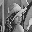

In [600]:
### Código da questão 1c.
im = Image.open("lena.bmp")  #O objeto im é da classe Image.
A = np.array(im)             #Transformo o objeto Image para a classe NP.array  
h, w = A.shape
print(f'Imagem original de tamanho: {h} x {w}')
im

for i in range(4):
   A = decimator(A)
   A = decimator(A.T).T
   
   
h, w = A.shape
print(f'Imagem decimada de tamanho: {h} x {w}')
im = Image.fromarray(A)
im

## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

In [601]:
### Código da questão 1d.
for _ in range(4):
      A = interpolator(A, INTERP_RULE["AVERAGE"])
      A = interpolator(A.T, INTERP_RULE["AVERAGE"]).T
      
h, w = A.shape
print(f'Imagem interpolada de tamanho: {h} x {w}')
im = Image.fromarray(A)
im

ValueError: not enough values to unpack (expected 2, got 1)

# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [ ]:
### Código da questão 2a.

## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

In [ ]:
### Código da questão 2b.

## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [ ]:
### Código da questão 2c.

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

In [ ]:
### Código da questão 2d.

## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

In [ ]:
### Códgio da Questão 2e
sinal = sp.io.loadmat('data_projeto1.mat')['sinal'].ravel()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [ ]:
### Código da questão 3a

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

In [ ]:
### Código da questão 3b